In [13]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#Dimensiones de la imagen a crear
ancho = 800
alto = 800

In [15]:
#Crea una imagen de un único plano
# Al ser un único plano, se interpreta como nivel de gris (0 negro, 255 blanco)
gris_img = np.zeros((alto,ancho,1), dtype = np.uint8)
#Muestra dimensiones de la imagen creada
print(gris_img.shape)

(800, 800, 1)


EJERCICIO 1: CREAR UNA IMAGEN CON LA TEXTURA DE UN TABLERO DE AJEDREZ

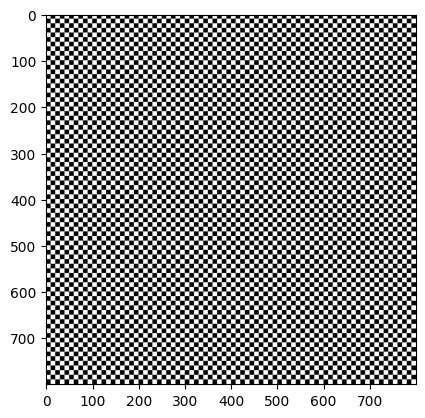

In [16]:
#TABLERO DE AJEDREZ JUAN JESÚS
var = True
for i in range(0, ancho, 10):
    for j in range(0, ancho, 20):
        if var:
            gris_img[i:i+10,j:j+10] = 255 #pitamos los cuadrados desfasados si var es TRUE
        else:
            gris_img[i:i+10,j+10:j+20] = 255 #pitamos los cuadrados si var es FALSE
    if var:
        var = False
    else:
        var = True
plt.imshow(gris_img, cmap='gray')
plt.show()

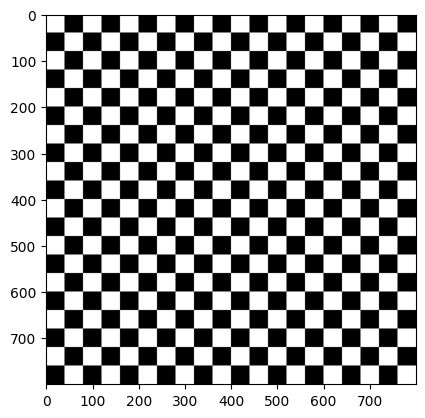

In [25]:
#TABLERO DE AJEDREZ ANTONIO

#Crea una imagen de un único plano
gris_img = np.zeros((alto,ancho,1), dtype = np.uint8)

#Pintamos los cuadrados blancos siguiendo un bucle
for i in range(0, 800, 80):
    for j in range(0, 800, 80):
        #Este parametro nos permite pintar en base a un alto y ancho con los valores de 0-255
        gris_img[0+i:40+i,0+j:40+j] = 255
        gris_img[40+i:80+i,40+j:80+j] = 255


#Muestra la imagen ya modificada
plt.imshow(gris_img, cmap='gray')
plt.show()

EJERCICIO 2: CREAR UNA IMAGEN ESTILO MONDRIAN

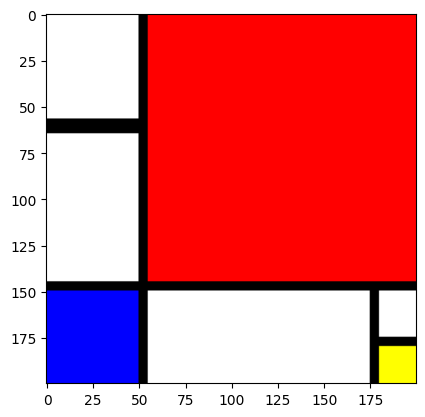

True

In [22]:
# Crea una imagen con tres planos
color_img = np.zeros((200,200,3), dtype = np.uint8)

# Rectangulos laterales blancos
color_img[:57,:50]= color_img[65:145,0:50] = 255
# Rectangulo blanco abajo
color_img[150:200,55:175] = 255
# Rectangulo más pequeño blanco
color_img[150:175,180:200] = 255
# Cuadrado amarillo
color_img[180:200,180:200,1] = color_img[180:200,180:200,0]= 255
# Cuadrado rojo
color_img[0:145,55:200,0] = 255
# Cuadrado azul
color_img[150:200,0:50,2]= 255 

# Mostramos la imagen
plt.imshow(color_img) 
plt.show()


# Salva la imagen resultante a disco
cv2.imwrite('imagen.jpg', color_img)

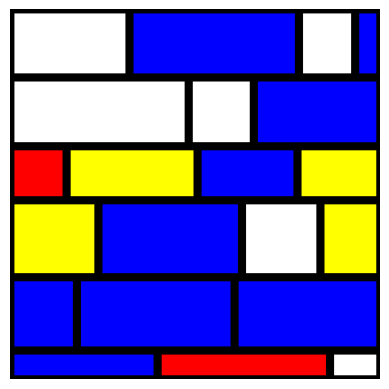

In [17]:
import random


# Crear una imagen en blanco (500x500 píxeles)
image = np.ones((500, 500, 3), dtype=np.uint8) * 255

# Colores característicos de Mondrian
colors = {
    'red': (0, 0, 255),
    'blue': (255, 0, 0),
    'yellow': (0, 255, 255),  # Amarillo corregido
    'white' : (255,255,255)
}

# Añadir líneas negras de separación
line_thickness = 10

# Lista para almacenar los rectángulos generados (x, y, width, height)
rects_generados = []

def crearRectangulo(image, x, y, width, height, color):
    # Asegurarse de que el rectángulo no se salga de los límites de la imagen
    if x + width > 500:
        width = 500 - x
    if y + height > 500:
        height = 500 - y

    # Dibujar el rectángulo con color
    cv2.rectangle(image, (x, y), (x + width, y + height), color, -1)
    # Dibujar el borde negro
    cv2.rectangle(image, (x, y), (x + width, y + height), (0, 0, 0), line_thickness)

def se_superpone(rect, x, y, width, height):
    """Verifica si el nuevo rectángulo se superpone con alguno de la lista."""
    for r in rect:
        rx, ry, rwidth, rheight = r #guardamos las variables de la lista de rectangulos
        if x < rx + rwidth and x + width > rx and y < ry + rheight and y + height > ry: #comparamos si las posicion actual ya esta ocupada
            return True
    return False

def generar_mondrian(image):
    y = 0

    while y < 500:
        x = 0
        altura_maxima_fila = random.randint(50, 150)  # Altura máxima de la fila actual
        
        while x < 500:
            # Ancho aleatorio para el nuevo rectángulo
            width = random.randint(50, 250)
            # Altura aleatoria, controlada para no ser mayor que el rectángulo superior
            height = altura_maxima_fila

            # Evitar superposiciones y asegurar que no se pase de los bordes
            if not se_superpone(rects_generados, x, y, width, height):
                color = random.choice(list(colors.values()))  # Elegir color aleatorio
                crearRectangulo(image, x, y, width, height, color)
                rects_generados.append((x, y, width, height))  # Guardar el nuevo rectángulo

            # Avanzar en la posición x después de cada rectángulo
            x += width

        # Moverse hacia abajo después de completar una fila
        y += altura_maxima_fila

# Generar la imagen estilo Mondrian
generar_mondrian(image)

# Mostrar la imagen
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Quitar los ejes
plt.show()


EJERCICIO 3: HACER USO DE FUNCIONES DE DIBUJO OPENCV

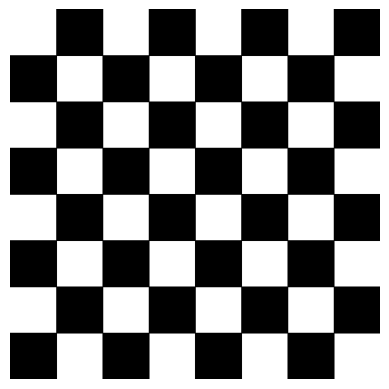

In [18]:
#TAREA 3 JUAN JESÚS
image = np.ones((480, 480, 3), dtype=np.uint8) * 255 #imagen de 480x480, 8 cuadrados de 60 píxeles

cuadrados = 8 #numero de cuadrados
tamaño = 60 #tamaño de caudrados

for y in range(cuadrados):
    for x in range(cuadrados):
        
        #calculo de coordenadas x,y inicial del cuadrado
        x_inicio = x * tamaño 
        y_inicio = y * tamaño
        
        #pintado de cuadrados
        if (x % 2 != 0 and y % 2 == 0):
            #si estamos en posicion impar en el eje x y par en el eje y pintamos los cuadrados
            cv2.rectangle(image, (x_inicio, y_inicio), (x_inicio+60, y_inicio+60), (0,0,0), -1)
        elif (x % 2 == 0 and y % 2 != 0):
            #si estamos en posicion par en el eje x e impar en el eje y pintamos los cuadrados
            cv2.rectangle(image, (x_inicio, y_inicio), (x_inicio+60, y_inicio+60), (0,0,0), -1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Quitar los ejes
plt.show()

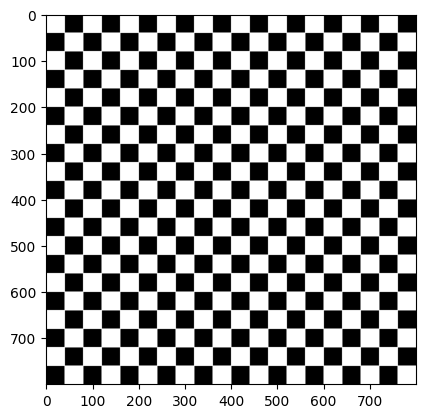

In [26]:
#TAREA 3 ANTONIO

#Crea una imagen de un único plano
gris_img = np.zeros((alto,ancho,1), dtype = np.uint8)

#Pintamos los cuadrados blancos siguiendo un bucle
for i in range(0, 800, 80):
    for j in range(0, 800, 80):
        #Esta funcion nos permite pintar rectangulos/cuadrados siguiendo una serie de coordenadas
        cv2.rectangle(gris_img, (0+i, 0+j), (40+i, 40+j), (255,255,255), -1)
        cv2.rectangle(gris_img, (40+i, 40+j), (80+i, 80+j), (255,255,255), -1)

#Muestra la imagen ya modificada
plt.imshow(gris_img, cmap='gray')
plt.show()

EJERCICIO 4: MODIFICAR LOS VALORES DE UN PLANO DE LA IMAGEN

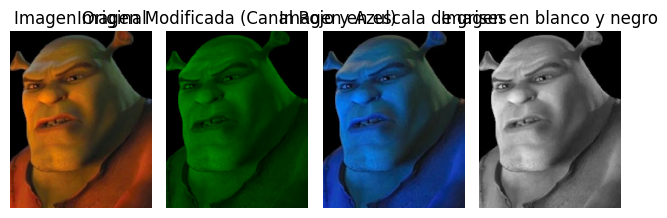

In [19]:
#TAREA 4 JUAN JESÚS
image = cv2.imread('imagen2.jpg')

if image is None:
    print("No se pudo cargar la imagen.")
else:
    # Separar los canales de color BGR
    blue, green, red = cv2.split(image)
    
    # Modificar el canal rojo (por ejemplo, hacerlo todo cero para quitar el color rojo)
    red_modificado = red // 100 
    blue_modificado = blue // 50
    # Volver a unir los canales modificados
    image_modificada = cv2.merge((blue_modificado, green, red_modificado))

    # Mostrar la imagen original y la modificada
    plt.subplot(1, 4, 1)
    plt.title('Imagen Original')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title('Imagen Modificada (Canal Rojo y Azul)')
    plt.imshow(cv2.cvtColor(image_modificada, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.title('Imagen en escala de grises')
    plt.imshow(cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE))
    plt.axis('off')
    
    
    image_grayscale = cv2.imread('imagen2.jpg', cv2.IMREAD_GRAYSCALE)
    plt.subplot(1, 4, 4)
    plt.title('Imagen en blanco y negro')
    plt.imshow(image_grayscale, cmap="gray")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


In [29]:
from random import randrange

In [30]:
#TAREA 4 ANTONIO

# Abre vídeo
vid = cv2.VideoCapture(0)

# Iniciamos con el bucle
while(True):
    # fotograma a fotograma      
    ret, frame = vid.read()

    # Si hay fotograma
    if ret:

        #Separamos el canal azul
        b = frame[:,:,0]

        # Y a medida que entramos a esta condicion aumentamos de manera aleatoria la intensidad del canal
        b = cv2.add(b, randrange(10,50))
    
        #Mostramos el canal
        cv2.imshow('RGB', b)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()

# Destruimos todas las ventanas
cv2.destroyAllWindows()

EJERCICIO 5: Destacar tanto el píxel con el color más claro como con el color más oscuro de una imagen

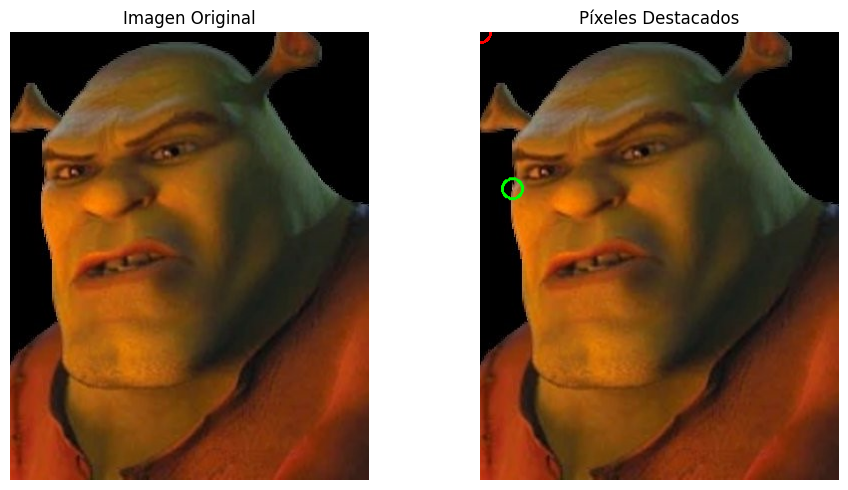

In [20]:
#TAREA 5 JUAN JESÚS

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
image = cv2.imread('imagen2.jpg')

# Convertir a escala de grises para facilitar el cálculo de claros y oscuros
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Encontrar el valor mínimo (más oscuro) y el valor máximo (más claro) en la imagen
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_image)

# Crear una copia de la imagen para destacar los píxeles
image_destacada = image.copy()

# Destacar el píxel más oscuro con un círculo de color rojo
cv2.circle(image_destacada, min_loc, 10, (0, 0, 255), 2)  # Rojo (BGR)

# Destacar el píxel más claro con un círculo de color verde
cv2.circle(image_destacada, max_loc, 10, (0, 255, 0), 2)  # Verde (BGR)

# Mostrar la imagen original y la imagen destacada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convertir a RGB para mostrar correctamente en matplotlib
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Píxeles Destacados")
plt.imshow(cv2.cvtColor(image_destacada, cv2.COLOR_BGR2RGB))  # Convertir a RGB para mostrar correctamente en matplotlib
plt.axis('off')

plt.tight_layout()
plt.show()


In [31]:
# TAREA 5 ANTONIO

# Abre vídeo
vid = cv2.VideoCapture(0)

# Iniciamos con el bucle
while(True):
    # fotograma a fotograma      
    ret, frame = vid.read()

    # Si hay fotograma
    if ret:  

        # Transformo el frame en escala de grises
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Localizo el valor minimo y maximo junto con sus coordenadas de dicho frame convertido
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_frame)
        # Dibujo en esas coordenadas un circulo donde el rojo representa el valor minimo y el verde representa el valor maximo
        cv2.circle(frame, max_loc, 20, (0, 255, 0), 2)
        cv2.circle(frame, min_loc, 20, (0, 0, 255), 2)
        # Muestro la imagen
        cv2.imshow('Vid', frame)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

EJERCICIO 6: IMAGEN POP ART

In [23]:
import cv2  
import numpy as np

In [24]:
# Abre vídeo
vid = cv2.VideoCapture(0)
  
# Iniciamos con el bucle
while(True):
    # fotograma a fotograma      
    ret, frame = vid.read()

    # Si hay fotograma
    if ret:

        # Reescalo la imagen a 640x480
        frame = cv2.resize(frame, (640, 480))

        # Genero 4 copias del frame
        frame1 = frame.copy()
        frame2 = frame.copy()
        frame3 = frame.copy()
        frame4 = frame.copy()

        # El primero seria colores invertidos
        frame1 = cv2.bitwise_not(frame1)

        #El rojo estara presente
        frame2[:, :, 0] = 0
        frame2[:, :, 1] = 0

        #El verde estara presente
        frame3[:, :, 0] = 0
        frame3[:, :, 2] = 0

        #El azul estara presente
        frame4[:, :, 1] = 0
        frame4[:, :, 2] = 0

        # Junto los dos primeros frames, luego los otros dos y en vertical junto ambas combinaciones
        top_row = np.hstack((frame1, frame2))
        bottom_row = np.hstack((frame3, frame4))
        combined_image = np.vstack((top_row, bottom_row))

        # Muestro la imagen combinada
        cv2.imshow('Vid', combined_image)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()